In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from PIL import Image
import fitz
import os
from skimage.filters import (threshold_otsu, threshold_niblack,
                             threshold_sauvola)

In [2]:
window_size = 25
const = 0
folders = ['Bach', 'Beethoven']

## From pdf to set of images

In [ ]:
def filter_listdir(l):
    return [el for el in l if el[-4:] == '.pdf']

In [ ]:
for folder in folders:
    pdfs = os.listdir(folder)
    pdfs = filter_listdir(pdfs)
    
    index = 0
    for pdf in pdfs:
        pdffile = folder + '/' + pdf
        doc = fitz.open(pdffile)
        
        for i in range(index, index + len(doc)):
            page = doc.loadPage(i - index)  # number of page
            pix = page.get_pixmap()
            output = folder + '/images/' + folder.lower() + '_' + str(i).zfill(4) + ".jpg"
            pix.save(output)
            
        index = index + len(doc)

## Remove edges

In [7]:
def remove_edges(im):
    gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    binary = gray > 100
    _, contours, hierarchy = cv2.findContours(binary.astype('uint8'), cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)

    areas = [cv2.contourArea(cnt) for cnt in contours]
    
    index = np.argmax(areas)

    x,y,w,h = cv2.boundingRect(contours[index])
    
    return im[y:y+h, x:x+w]
    

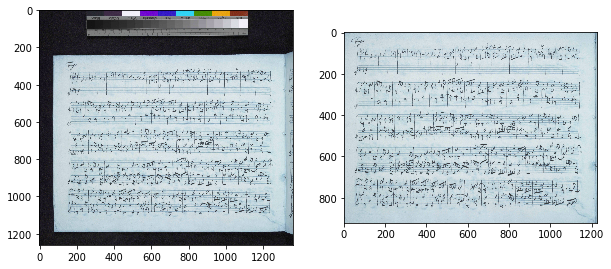

In [8]:
im = cv2.imread('Bach/images/bach_0316.jpg')
im_new = remove_edges(im)

fig = plt.figure(figsize = (10,10))
fig.add_subplot(1, 2, 1)
plt.imshow(im)
fig.add_subplot(1, 2, 2)
plt.imshow(im_new[30:-30,30:-30])

plt.show()

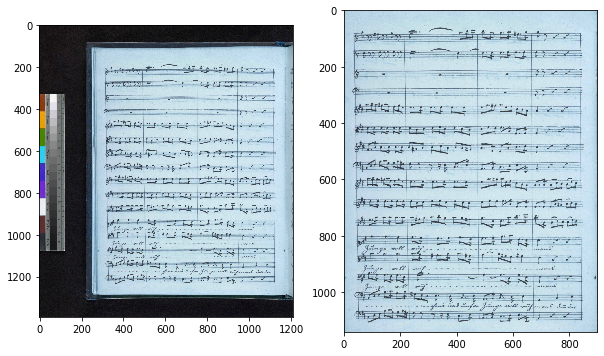

In [9]:
im = cv2.imread('Bach/images/bach_0029.jpg')
im_new = remove_edges(im)

fig = plt.figure(figsize = (10,10))
fig.add_subplot(1, 2, 1)
plt.imshow(im)
fig.add_subplot(1, 2, 2)
plt.imshow(im_new[30:-30,30:-30])

plt.show()

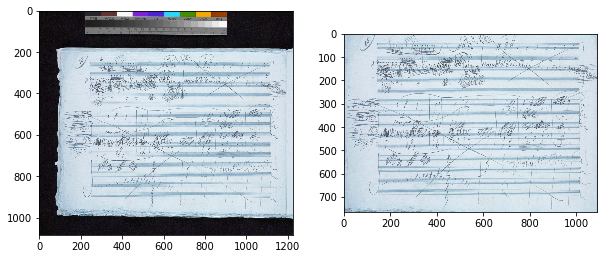

In [10]:
im = cv2.imread('Beethoven/images/beethoven_0103.jpg')
im_new = remove_edges(im)

fig = plt.figure(figsize = (10,10))
fig.add_subplot(1, 2, 1)
plt.imshow(im)
fig.add_subplot(1, 2, 2)
plt.imshow(im_new[30:-30,30:-30])

plt.show()